<a href="https://colab.research.google.com/github/trevor-webster/2024Fall-MOCS/blob/main/Assignment2CellularAutomata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment #2**
Carina Manitius, Trevor Webster, Derek Devine, Nate Borland

# 1

# City Growth

$$X_{N+1} = r X_N(1-X_N)$$

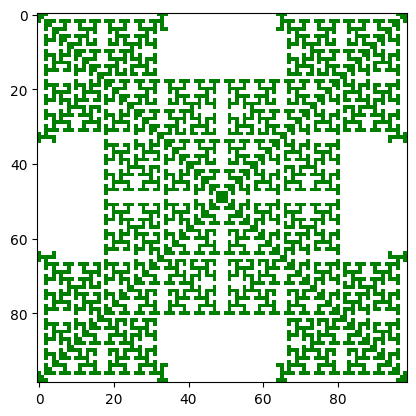

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

import time

# chance to turn into a city for each possible number of city neighbors
chance_0 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_1 = 1 # @param {type:"slider", min:0, max:1, step:0.01}
chance_2 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_3 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_4 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_5 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_6 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_7 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_8 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
r_growth_rate   = 1 # @param {type:"slider", min:0, max:1, step:0.01}
# listed for easy indexing
chances = [chance_0, chance_1, chance_2, chance_3, chance_4, chance_5, chance_6, chance_7, chance_8]
K = 9 - 1
# displays the current state of green_world cells
def display_world(world):
    plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
    display.display(plt.gcf())
    display.clear_output(wait=True)

# counts up the city neighbors of the world cell at [i,j]
def count_city_neighbors(world, world_size, i, j):
    neighborhood = world[max(i-1,0):min(i+2,world_size), max(j-1,0):min(j+2,world_size)]
    count = np.count_nonzero(neighborhood)
    # for k in range(len(neighborhood)):
    #     for l in range(len(neighborhood[k])):
    #         if (k != i or l != j) and neighborhood[k][l] == 1:
    #             count+=1
    # for k in range(max(0, i-1), min(world_size, i+2)):
    #     for l in range(max(0, j-1), min(world_size, j+2)):
    #         # if (k != i or l != j) and world[k,l] == 1:
    #         if world[k][l] == 1:
    #             count += 1
    
    return count

def logistic_rule(neighbor_count):
    return np.random.rand() < r_growth_rate * (neighbor_count/K) * (1 - (neighbor_count/K))

## Explicit zoning rules for each neighbor count
def rule(neighbor_count):
    return (chances[neighbor_count] > 0 and np.random.rand() < chances[neighbor_count])

def update_world(world, world_size):
    next_world = world.copy()
    reached_edge = False
    for i in range(world_size):
        for j in range(world_size):
            if world[i][j] == 1:
                continue
            neighbor_count = count_city_neighbors(world, world_size,i,j)
            if(rule(neighbor_count)):
                next_world[i,j] = 1
                if i == 0 or j == 0 or i == world_size-1 or j == world_size-1:
                    reached_edge = True
            
    # print(next_world)
    return (next_world, reached_edge)

def run_percolation():
    size = 99
    world = np.zeros((size,size))
    world[size//2,size//2] = 1
    reached_edge = False
    n = 0
    while not reached_edge:
        display_world(world)
        time.sleep(0.1)
        (world, reached_edge) = update_world(world, size)
    return world


world = run_percolation()
# display_world(world)


## Stochastic CA to reach percolation threshold of green using even random dispersion of slime mold

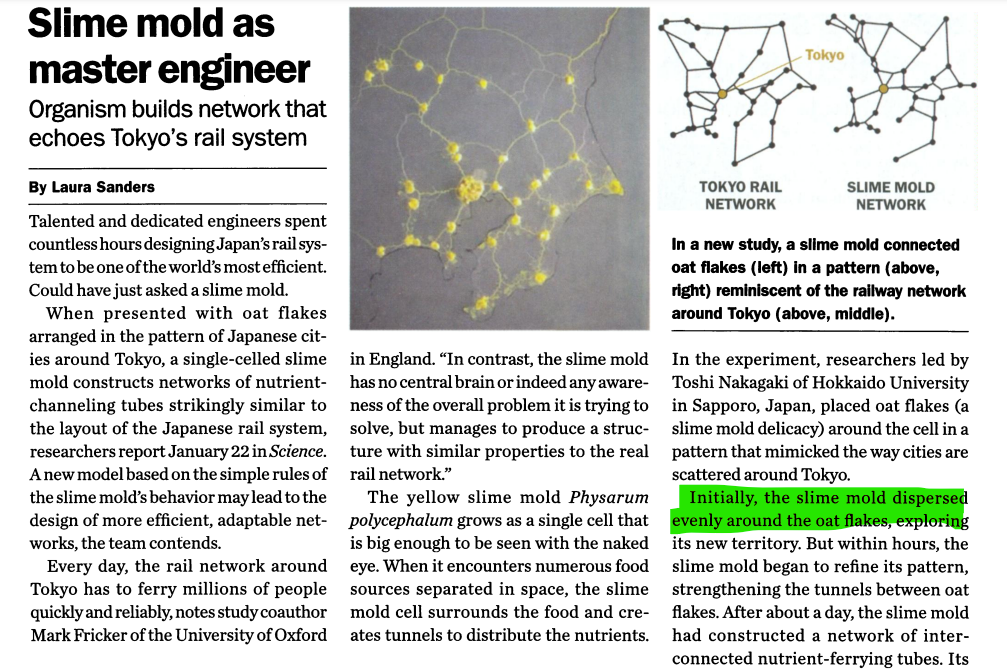

In [23]:

# displays the current state of green_world cells
def display_world(world):
    plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
    display.display(plt.gcf())
    display.clear_output(wait=True)

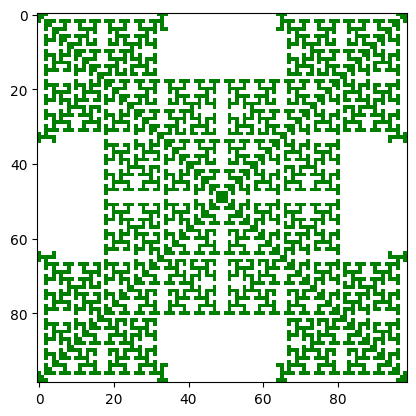

In [2]:
green_world = np.abs(world - 1)
display_world(green_world)

In [24]:
import numpy as np
import random

# Site percolation
def run_percolation(world, probability):
    N1 = world.shape[0]
    N2 = world.shape[1]
    for i in range(N1): #for cell in every row
        for j in range(N2): #and every column
            die = random.uniform(0, 1)
            # world[(i,j)] = world[(i,j)] or (die < probability)
            if die < probability:
              world[(i,j)] = 1
            else:
              world[(i,j)] = 0

    return (world)

def find_largest_cluster(world,structure, p):
    label_world, nb_labels = ndimage.label(world,structure) #label clusters
    sizes = ndimage.sum(world, label_world, range(nb_labels + 1)) # Get sizes of clusters
    mask_largest_cluster = sizes >= sizes.max()
    binary_img = mask_largest_cluster[label_world]
    return binary_img, sizes.max(), label_world, nb_labels

0.5899999999999997 Largest cluster 2438.0
Percent of Greenspace to Total Land: 0.59521484375
    Probability (p)  Cluster Size (S)  Greenspace  labels
0              0.10               6.0    0.001465     282
1              0.11               6.0    0.001465     300
2              0.12              11.0    0.002686     279
3              0.13               9.0    0.002197     294
4              0.14               8.0    0.001953     313
5              0.15              11.0    0.002686     287
6              0.16              11.0    0.002686     321
7              0.17              25.0    0.006104     320
8              0.18              16.0    0.003906     314
9              0.19              14.0    0.003418     309
10             0.20              20.0    0.004883     309
11             0.21              23.0    0.005615     291
12             0.22              23.0    0.005615     276
13             0.23              40.0    0.009766     283
14             0.24              46.0

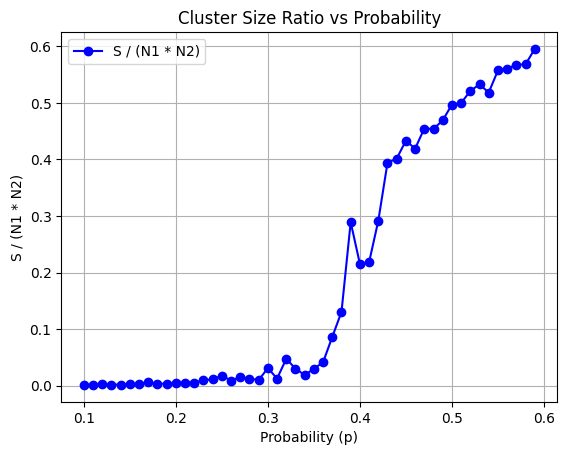

In [29]:
import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm
import pandas as pd
from IPython import display
import time



res=[]
p_values = np.arange(0.1, 0.6, 0.01)
# Parameters
N1, N2 = 64, 64 #height, width

# structure = [[0,1,0],[1,1,1],[0,1,0]] #define connection
structure = [[1,0,1],[0,1,0],[1,0,1]] #define connection
structure_kagame = [[1, 1, 1],
             [1, 0, 1],
             [1, 1, 1]]
world = np.zeros((N1,N2))   
for p in p_values:
    world = run_percolation(world,p) #run model
    # find_largest_cluster(world,structure, p)
    cluster_world, S, label_world, nb_labels = find_largest_cluster(world,structure_kagame, p)
    res.append((p, S, S / (N1*N2),  nb_labels ))
    green_world = np.abs(cluster_world - 1)
    time.sleep(0.1)

# display_world(green_world)

print(f"{p} Largest cluster {S}")
print(f"Percent of Greenspace to Total Land: {S / (N1*N2)}")
df = pd.DataFrame(res, columns=["Probability (p)", "Cluster Size (S)", "Greenspace", "labels"])
print(df)

# Plotting the results
(p_values, S, S_by_N, nb_labels ) = map(np.array, zip(*res))
plt.plot(p_values, S_by_N, marker='o', linestyle='-', color='b', label='S / (N1 * N2)')

plt.title('Cluster Size Ratio vs Probability')
plt.xlabel('Probability (p)')
plt.ylabel('S / (N1 * N2)')
plt.grid(True)
plt.legend()
plt.show()

# unique, counts = np.unique(label_world, return_counts=True)

## Random

Percent of Greenspace to Total Land:  0.43209876543209874
Total Iterations:  178
Total updates:  45
Ratio of updates to iterations:  0.25280898876404495
Ratio of iterations to updates:  3.9555555555555557


KeyboardInterrupt: 

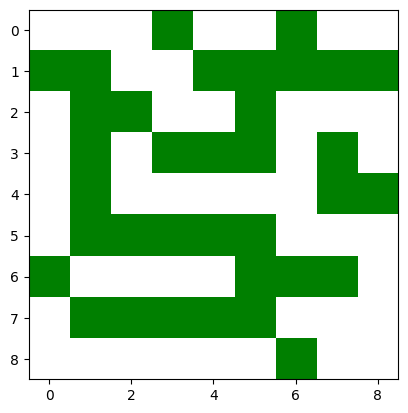

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display
import math

import time

# chance to turn into a city for each possible number of city neighbors
chance_0 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_1 = 1 # @param {type:"slider", min:0, max:1, step:0.01}
chance_2 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_3 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_4 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_5 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_6 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_7 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_8 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
r_growth_rate   = 1 # @param {type:"slider", min:0, max:1, step:0.01}
max_neighbors   = 3 # @param {type:"slider", min:0, max:8, step:1}
# listed for easy indexing
chances = [chance_0, chance_1, chance_2, chance_3, chance_4, chance_5, chance_6, chance_7, chance_8]
K = 9 - 1
# displays the current state of world cells
def display_world(world):
    plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
    display.display(plt.gcf())
    display.clear_output(wait=True)

# counts up the city neighbors of the world cell at [i,j]
def count_city_neighbors(world, world_size, i, j):
    neighborhood = world[max(i-1,0):min(i+2,world_size),
                         max(j-1,0):min(j+2,world_size)]
    count = np.count_nonzero(neighborhood)
    # for k in range(len(neighborhood)):
    #     for l in range(len(neighborhood[k])):
    #         if (k != i or l != j) and neighborhood[k][l] == 1:
    #             count+=1
    # for k in range(max(0, i-1), min(world_size, i+2)):
    #     for l in range(max(0, j-1), min(world_size, j+2)):
    #         # if (k != i or l != j) and world[k,l] == 1:
    #         if world[k][l] == 1:
    #             count += 1

    return count

def logistic_rule(neighbor_count):
    return np.random.rand() < r_growth_rate * (1 - (neighbor_count/K))

## Explicit zoning rules for each neighbor count
def rule(neighbor_count):
    return (chances[neighbor_count] > 0 and np.random.rand() < chances[neighbor_count])
    #return (chances[neighbor_count] > 0 )

# def update_world(world, world_size):
#     next_world = world.copy()
#     reached_edge = False
#     for i in range(world_size):
#         for j in range(world_size):
#             if world[i][j] == 1:
#                 continue
#             neighbor_count = count_city_neighbors(world, world_size,i,j)
#             if(visited[i,j]!=1 and neighbor_count <=3):
#                 print('turned on cell')
#                 print(i)
#                 print(j)
#                 next_world[i,j] = 1
#                 visited[i,j] = 1
#                 if i == 0 or j == 0 or i == world_size-1 or j == world_size-1:
#                     reached_edge = True


def update_world(world, visited, world_size,updates):
    next_world = world.copy()
    #reached_edge = False
    i = np.random.randint(0,world_size)
    j = np.random.randint(0,world_size)
    neighbor_count = count_city_neighbors(world, world_size,i,j)
    #if(visited[i,j]!=1 and np.count(neighborhood)  neighbor_count <=max_neighbors):
    if(visited[i,j]!=1 and neighbor_count <=max_neighbors):
                print("Developed cell: ","(",i,",",j,")")
                next_world[i,j] = 1
                visited[i,j] = 1
                updates += 1
    # print(next_world)
    return (next_world, visited,updates)

size = 9
world = np.zeros((size,size))
#world = np.arange(size**2).reshape(size,size)
# print(world)
# i = 6
# j = 6
# print(get_neighborhood(world,size,i,j))
world[size//2,size//2] = 1
visited = world
reached_edge = False
n = 0
# while not reached_edge:
#     display_world(world)
#     # time.sleep(0.1)
#     (world, visited, reached_edge) = update_world(world, visited, size)
updates=0
iterations=0
bifurcationTime = True
square2time = True
goldentime = True
square3time = True
square5time = True
oneplusgoldentime = True
etime =  True
chaostime = True
# Calculate the start time
gridSize=size*size
start = time.time()
while updates < gridSize:
    iterations += 1

    print("Percent of Greenspace to Total Land: ",(gridSize-(updates+1))/gridSize)
    print('Total Iterations: ',iterations)
    print('Total updates: ',updates)
    print('Ratio of updates to iterations: ',updates/iterations)

    if updates>0:
      print("Ratio of iterations to updates: ",iterations/updates)



    if (updates > 0 and iterations/updates >= 1.3680989 and (gridSize-(updates+1))/gridSize < .99 and bifurcationTime):
      print("Time at the bifurcation parameter real 1 parameter map, where feigenbaum constant is first defined is: ",start-time.time())
      bifurcationTime = False

    if (updates > 0 and iterations/updates >= math.sqrt(2) and (gridSize-(updates+1))/gridSize < .99 and square2time):
      print("Time at the square root of 2 is: ",start-time.time())
      square2time = False

    if (updates > 0 and iterations/updates >= (math.sqrt(5)+1)/2 and (gridSize-(updates+1))/gridSize < .99 and goldentime):
      print("Time at golden ratio is: ",start-time.time())
      goldentime = False

    if (updates > 0 and iterations/updates >= math.sqrt(3) and (gridSize-(updates+1))/gridSize < .99 and square3time):
      print("Time at the square root of 3 is: ",start-time.time())
      square3time = False

    if (updates > 0 and iterations/updates >= math.sqrt(5) and (gridSize-(updates+1))/gridSize < .99 and square5time):
      print("Time at square root of 5 is: ",start-time.time())
      square5time = False

    if (updates > 0 and iterations/updates >= (math.sqrt(5)+1)/2 + 1 and (gridSize-(updates+1))/gridSize < .99 and oneplusgoldentime):
      print("Time at 1+golden ratio is: ",start-time.time())
      oneplusgoldentime = False

    if (updates > 0 and iterations/updates >= math.exp(1) and (gridSize-(updates+1))/gridSize < .99 and etime):
      print("Time at e is: ",start-time.time())
      etime = False

    if (updates > 0 and iterations/updates >= 3.57 and (gridSize-(updates+1))/gridSize < .99 and chaostime):
      print("Time at chaos is: ",start-time.time())
      chaostime = False
      #break;

    if((updates/iterations - 1/math.exp(1)) < -(1/math.exp(1)*(1/3)) and updates>0):
      end = time.time()
      break;
    display_world(world)
    # time.sleep(0.1)
    (world, visited,updates) = update_world(world, visited, size, updates)
#display_world(world)
length = end - start
print("Simulation ran for: ",length," seconds.")
#print(np.random.rand())
